In [3]:
import pandas as pd
# dataset
df = pd.read_csv(r"D:\Excelr\Data Science\Data Science Assignment\Basic statistics level 1\Basic stats - 1\Basic stats - 1\sales_data_with_discounts.csv")

df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.50120
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102960,89323.89704
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910160,102042.08980
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.92530
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.05377


In [4]:
df.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495426,47847.912855
max,31.000000,60100.000000,196400.000000,19.992407,25738.022190,179507.479000


In [5]:
# descriptive statistics for numerical columns
numerical_columns = ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']
# mean, median, mode, and standard deviation for numerical columns
statistics = {'Mean': df[numerical_columns].mean(),
              'Median': df[numerical_columns].median(),
              'Mode': df[numerical_columns].mode().iloc[0],  # using first mode as some columns may have multiple modes
              'Standard Deviation': df[numerical_columns].std()}
stats_df = pd.DataFrame(statistics)
print(stats_df)

                           Mean       Median          Mode  Standard Deviation
Volume                 5.066667     4.000000      3.000000            4.231602
Avg Price          10453.433333  1450.000000    400.000000        18079.904840
Total Sales Value  33812.835556  5700.000000  24300.000000        50535.074173
Discount Rate (%)     15.155242    16.577766      5.007822            4.220602
Discount Amount     3346.499424   988.933733     69.177942         4509.902963
Net Sales Value    30466.336131  4677.788059    326.974801        46358.656624


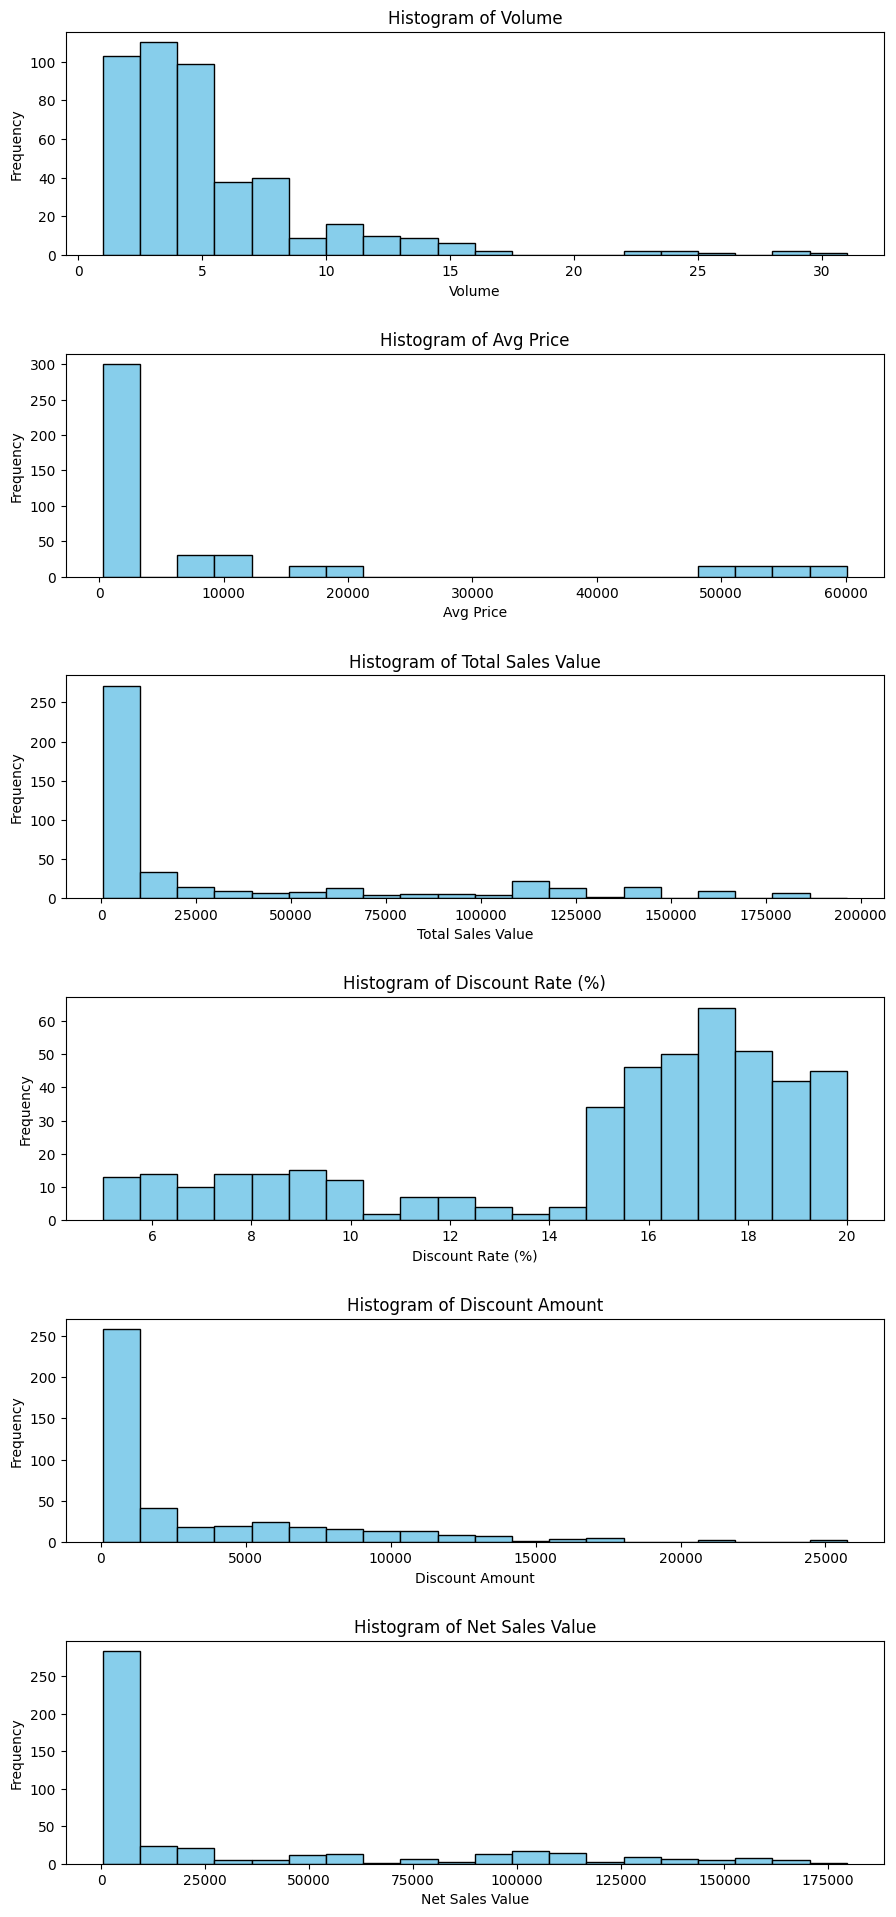

In [17]:
import matplotlib.pyplot as plt
# Plot histograms for each numerical column
fig, axs = plt.subplots(len(numerical_columns), figsize=(10, 20))
fig.tight_layout(pad=5.0)

for i, column in enumerate(numerical_columns):
    axs[i].hist(df[column], bins=20, color='skyblue', edgecolor='black')
    axs[i].set_title(f'Histogram of {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Frequency')
plt.show()

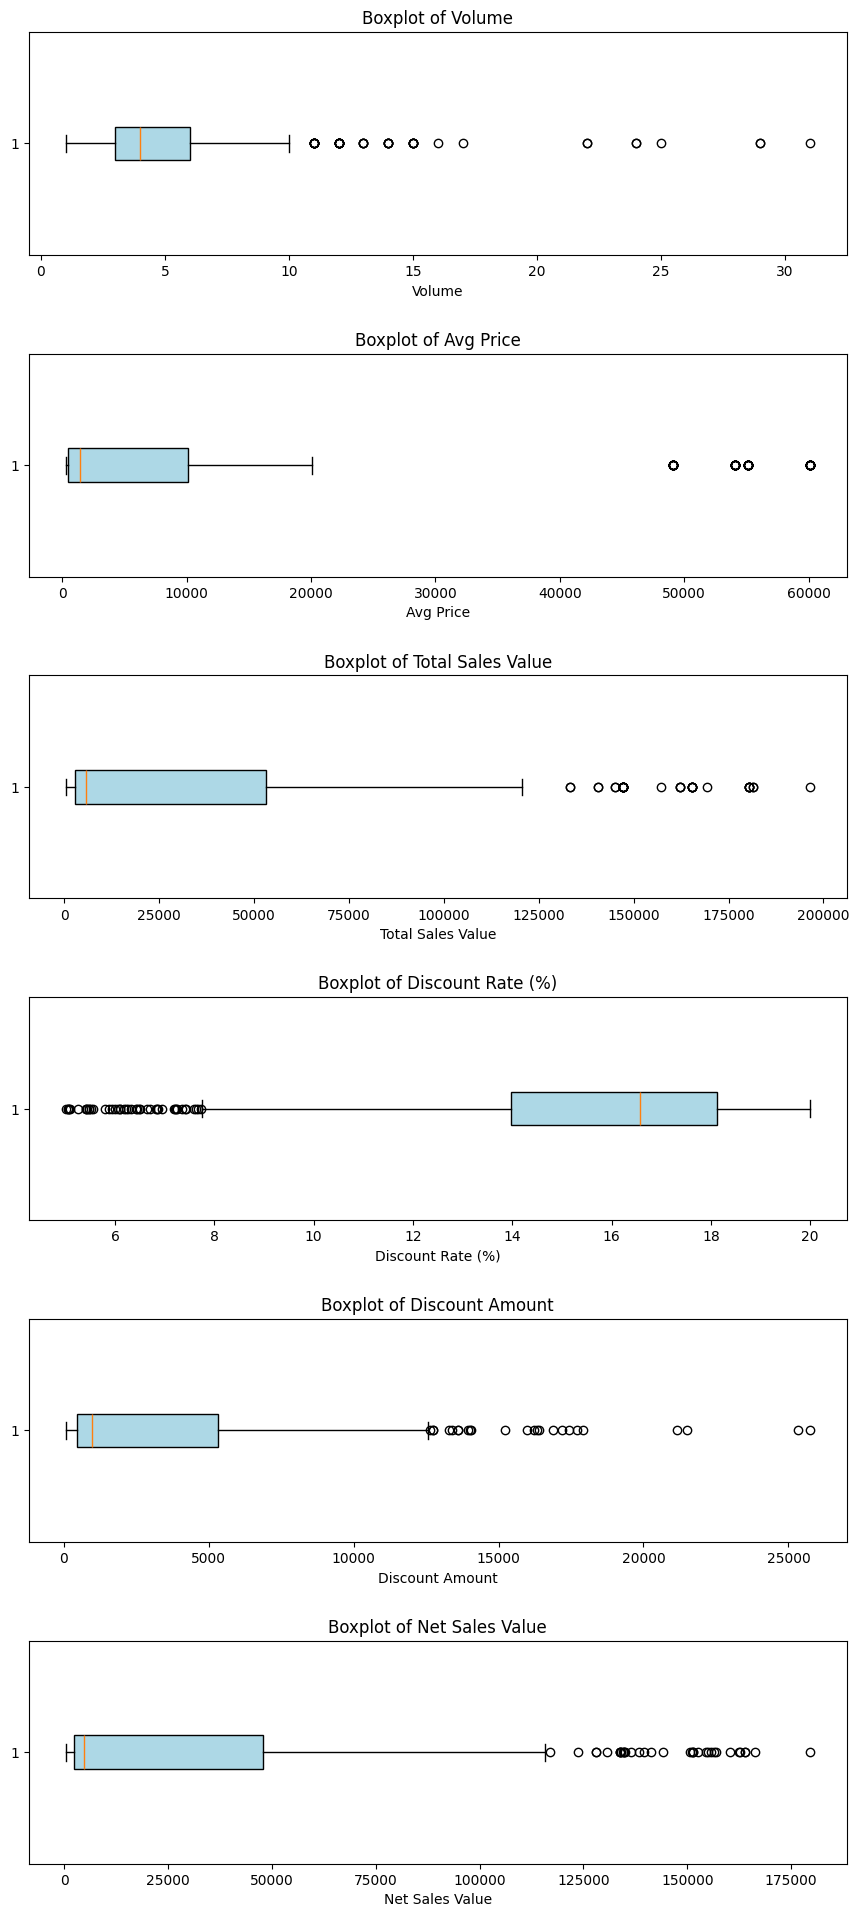

In [18]:
# Plot boxplots for each numerical column to identify outliers and IQR
fig, axs = plt.subplots(len(numerical_columns), figsize=(10, 20))
fig.tight_layout(pad=5.0)

for i, column in enumerate(numerical_columns):
    axs[i].boxplot(df[column], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    axs[i].set_title(f'Boxplot of {column}')
    axs[i].set_xlabel(column)
plt.show()

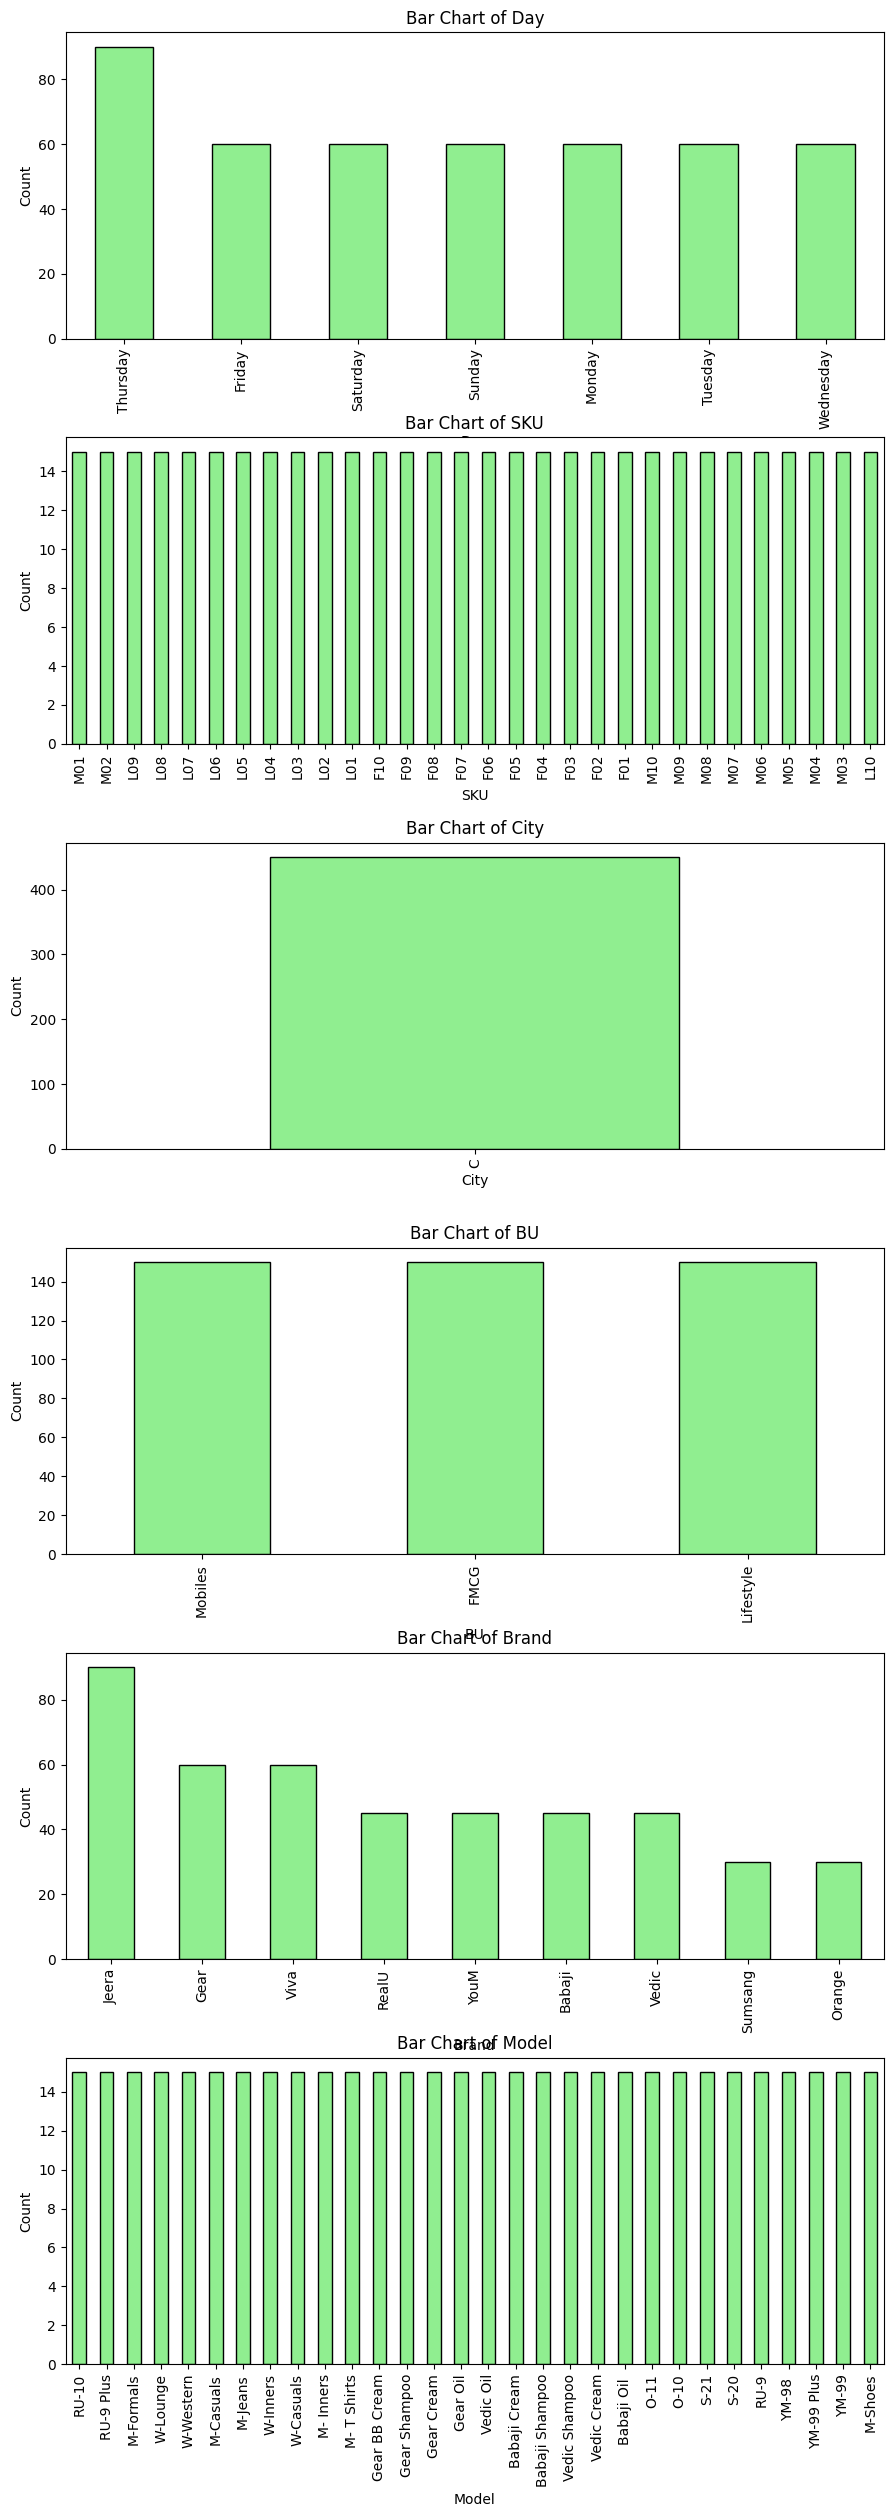

In [19]:
# categorical columns and creating bar charts
categorical_columns = ['Day', 'SKU', 'City', 'BU', 'Brand', 'Model']
# Plotting bar charts for categorical columns
fig, axs = plt.subplots(len(categorical_columns), figsize=(10, 25))
fig.tight_layout(pad=5.0)

for i, column in enumerate(categorical_columns):
    df[column].value_counts().plot(kind='bar', ax=axs[i], color='lightgreen', edgecolor='black')
    axs[i].set_title(f'Bar Chart of {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Count')
plt.show()

In [21]:
# Standardization of numerical columns using z-score normalization
df_standardized = df[numerical_columns].apply(lambda x: (x - x.mean()) / x.std())
# Showing before and after comparison for 'Volume' as an example
comparison_df = pd.DataFrame({'Original Volume': df['Volume'],'Standardized Volume': df_standardized['Volume']})
print(comparison_df)

     Original Volume  Standardized Volume
0                 15             2.347417
1                 10             1.165831
2                  7             0.456880
3                  6             0.220563
4                  3            -0.488389
..               ...                  ...
445                2            -0.724706
446                6             0.220563
447                2            -0.724706
448                3            -0.488389
449                1            -0.961023

[450 rows x 2 columns]


In [22]:
# One-hot encoding the categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns)
print(df_encoded)
# Displaying a portion of the transformed dataset

           Date  Volume  Avg Price  Total Sales Value  Discount Rate (%)  \
0    01-04-2021      15      12100             181500          11.654820   
1    01-04-2021      10      10100             101000          11.560498   
2    01-04-2021       7      16100             112700           9.456886   
3    01-04-2021       6      20100             120600           6.935385   
4    01-04-2021       3       8100              24300          17.995663   
..          ...     ...        ...                ...                ...   
445  15-04-2021       2       1300               2600          15.475687   
446  15-04-2021       6       2600              15600          17.057027   
447  15-04-2021       2       1600               3200          18.965550   
448  15-04-2021       3       1900               5700          16.793014   
449  15-04-2021       1       3100               3100          15.333300   

     Discount Amount  Net Sales Value  Day_Friday  Day_Monday  Day_Saturday  \
0       